## This is the Maxwell part of the system, how to compute the density and then the potential, to finally compute the electric field.

In [219]:
using Plots
using FFTW
FFTW.set_provider!("mkl")
using LinearAlgebra


In [220]:
include("aux_functions.jl")

differentials

We try a density and compute the potential. Then check it is working

In [ ]:
J = 128
L = 3.
dx = L/J
κ = 2π/L
x = [dx*(i-1) for i in 1:J]
ω = 5
v = sin.(κ*ω*x) + 3. * cos.(κ*4*ω*x)
ϕe = -(κ *ω )^(-2)*(sin.(κ*ω*x) + 3.0/4/4 * cos.(κ*4*ω*x))
u = zeros(J)
ϕ = get_ϕ!(u,v,κ);
ϕ_D = get_ϕ_D!(u,v,(0.0,L))

In [ ]:
plot(x,ϕ_D)
plot!(x,ϕe ,ls=:dash)

In [ ]:
plot(x, ϕ_D - ϕe)

Finally we check that the Electric field is computed correctly.

In [ ]:
E = zeros(J)
Electric!(ϕ, E, dx)
plot(x,E)

### 2D check

In [ ]:
include("aux_functions.jl")

J = (200,100)
Box = (0.0,1.0,0.0,2.0)
x = Box[1]:0.01:Box[2]
y = Box[3]:0.01:Box[4]

ρ = Array{Float64,2}(undef,J)

Box_array = [i for i in Box]
κ = 2π./(Box_array[2:2:end] - Box_array[1:2:end-1])

dx = (Box_array[2:2:end] - Box_array[1:2:end-1])./(J)

x = [Box[1] + (i-1)*dx[1]*(Box[2]-Box[1]) for i in 1:J[1]]
y = [Box[3] + (i-1)*dx[2]*(Box[4]-Box[3]) for i in 1:J[2]]

@show κ
@show k = [2,2].*κ

@show k'*k

#ρ = sin.(k[1]*x) * sin.(k[2]*y)'

for i in 1:J[1]
    for j in 1:J[2]
        ρ[i,j] = sin(k[1]*(i-1)*dx[1])*sin(k[2]*(j-1)*dx[2])
        #ρ[i,j] = sin(k[1]*(i-1)*dx[1])
        #ρ[i,j] = sin(k[2]*(j-1)*dx[2])
    end
end

ϕe = similar(ρ)

for i in 1:J[1]
    for j in 1:J[2]
        ρ[i,j] = sin(k[1]*(i-1)*dx[1])*sin(k[2]*(j-1)*dx[2])
        #ρ[i,j] = sin(k[1]*(i-1)*dx[1])
        #ϕe[i,j] = -k[2]^(-2)*sin(k[2]*(j-1)*dx[2])
        ϕe[i,j] = -(k[1]^2 + k[2]^2)^(-1)*sin(k[1]*(i-1)*dx[1])*sin(k[2]*(j-1)*dx[2])
    end
end

ϕ = similar(ρ)

#plot_matrix(ρ)

surface(y[1:end],x[1:end],ρ)

#plot(x,ρ[:,25])
#length(x)

In [ ]:
include("aux_functions.jl")
get_ϕ_D!(ϕ, ρ, Box)

#plot_matrix(ϕ)

surface(y,x,ϕ-ϕe)
#surface!(y,x,ϕe)
#plot(y,ϕ[45,:])
#plot!(y,ϕe[45,:], ls=:dash)

In [ ]:
maximum(ϕ)*(k'*k)

In [ ]:
norm(ϕ - ϕe)

### D = 3 Check

In [ ]:
include("aux_functions.jl")

J = (200,100,300)
Box = (0.0,1.0,0.0,2.0,1.0,4.0)

ρ = Array{Float64,3}(undef,J)

Box_array = [i for i in Box]
κ = 2π./(Box_array[2:2:end] - Box_array[1:2:end-1])

@show dx = (Box_array[2:2:end] - Box_array[1:2:end-1])./(J)

x = [Box[1] + (i-1)*dx[1]*(Box[2]-Box[1]) for i in 1:J[1]]
y = [Box[3] + (i-1)*dx[2]*(Box[4]-Box[3]) for i in 1:J[2]]
z = [Box[5] + (i-1)*dx[3]*(Box[6]-Box[5]) for i in 1:J[3]]

@show κ
@show kv = [2,2,4].*κ

@show kv'*kv

#ρ = sin.(k[1]*x) * sin.(k[2]*y)'

for i in 1:J[1]
    for j in 1:J[2]
        for k in 1:J[3]
            ρ[i,j,k] = sin(kv[1]*(i-1)*dx[1])*sin(kv[2]*(j-1)*dx[2])*sin(kv[3]*(k-1)*dx[3])
        end
        #ρ[i,j] = sin(k[1]*(i-1)*dx[1])
        #ρ[i,j] = sin(k[2]*(j-1)*dx[2])
    end
end

ϕe = similar(ρ)

for i in 1:J[1]
    for j in 1:J[2]
        for k in 1:J[3]
            ϕe[i,j,k] = -(kv[1]^2 + kv[2]^2 + kv[3]^2)^(-1)*sin(kv[1]*(i-1)*dx[1])*sin(kv[2]*(j-1)*dx[2])*sin(kv[3]*(k-1)*dx[3])
        end
    end
end



#plot_matrix(ρ)

surface(y,x,ρ[:,:,50])

#plot(x,ρ[:,25,30])
#length(x)

In [ ]:
ϕ = similar(ρ);
get_ϕ_D!(ϕ, ρ, Box);

In [ ]:
norm(ϕ - ϕe)

In [ ]:
surface(y,x,(ϕ-ϕe)[:,:,50])

## Checking getting E in one go

### 1D

In [ ]:
include("aux_functions.jl")
J = 128
L = 3.
dx = L/J
κ = 2π/L
x = [dx*(i-1) for i in 1:J]
ω = 5
ρ = sin.(κ*ω*x) + 3. * cos.(κ*4*ω*x)
Ee = (κ *ω )^(-2)*(κ*ω*cos.(κ*ω*x) - 3.0/4/4*κ*ω*4 * sin.(κ*4*ω*x))
E = zeros(J)
E = get_E!(E,ρ,(0.0,L))

In [ ]:
#plot(E-Ee)
plot(E)

### D = 2

In [221]:
include("aux_functions.jl")

J = (200,100)
Box = (0.0,1.0,0.0,2.0)
x = Box[1]:0.01:Box[2]
y = Box[3]:0.01:Box[4]

ρ = Array{Float64,2}(undef,J)

Box_array = [i for i in Box]
κ = 2π./(Box_array[2:2:end] - Box_array[1:2:end-1])

dx = (Box_array[2:2:end] - Box_array[1:2:end-1])./(J)

x = [Box[1] + (i-1)*dx[1]*(Box[2]-Box[1]) for i in 1:J[1]]
y = [Box[3] + (i-1)*dx[2]*(Box[4]-Box[3]) for i in 1:J[2]]

@show κ
@show k = [2,2].*κ

@show k'*k

#ρ = sin.(k[1]*x) * sin.(k[2]*y)'

for i in 1:J[1]
    for j in 1:J[2]
        ρ[i,j] = sin(k[1]*(i-1)*dx[1])*sin(k[2]*(j-1)*dx[2])
    end
end

Ee = Array{Float64,3}(undef,(2,J...))

for i in 1:J[1]
    for j in 1:J[2]
        Ee[1,i,j] = k[1]*(k[1]^2 + k[2]^2)^(-1)*cos(k[1]*(i-1)*dx[1])*sin(k[2]*(j-1)*dx[2])
        Ee[2,i,j] = k[2]*(k[1]^2 + k[2]^2)^(-1)*sin(k[1]*(i-1)*dx[1])*cos(k[2]*(j-1)*dx[2])
    end
end

E = Array{Float64,3}(undef,(2,J...))

#plot_matrix(ρ)

#surface(y[1:end],x[1:end],ρ)

#plot(x,ρ[:,25])
#length(x)

κ = [6.283185307179586, 3.141592653589793]
k = [2, 2] .* κ = [12.566370614359172, 6.283185307179586]
k' * k = 197.39208802178717


2×200×100 Array{Float64, 3}:
[:, :, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0

[:, :, 2] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0

[:, :, 3] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0

;;; … 

[:, :, 98] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0

[:, :, 99] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0

[:, :, 100] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0

In [222]:
get_E!(E,ρ,Box)

(J, κ) = ((200, 100), [6.283185307179586, 3.141592653589793])


200×100 Matrix{Float64}:
 -3.40373e-18  -3.47684e-18   2.25255e-18  …  -3.48432e-18  -3.49137e-18
  0.00199868    0.00198292    0.00193589       0.00193589    0.00198292
  0.00398948    0.00395802    0.00386414       0.00386414    0.00395802
  0.00596453    0.0059175     0.00577715       0.00577715    0.0059175
  0.00791604    0.00785362    0.00766735       0.00766735    0.00785362
  0.00983632    0.00975875    0.00952729   …   0.00952729    0.00975875
  0.0117178     0.0116254     0.0113496        0.0113496     0.0116254
  0.013553      0.0134461     0.0131272        0.0131272     0.0134461
  0.0153347     0.0152138     0.0148529        0.0148529     0.0152138
  0.0170559     0.0169214     0.0165201        0.0165201     0.0169214
  ⋮                                        ⋱                
 -0.0170559    -0.0169214    -0.0165201       -0.0165201    -0.0169214
 -0.0153347    -0.0152138    -0.0148529       -0.0148529    -0.0152138
 -0.013553     -0.0134461    -0.0131272       -0.0131272

In [223]:
norm(E-Ee)

3.71241185976361e-15

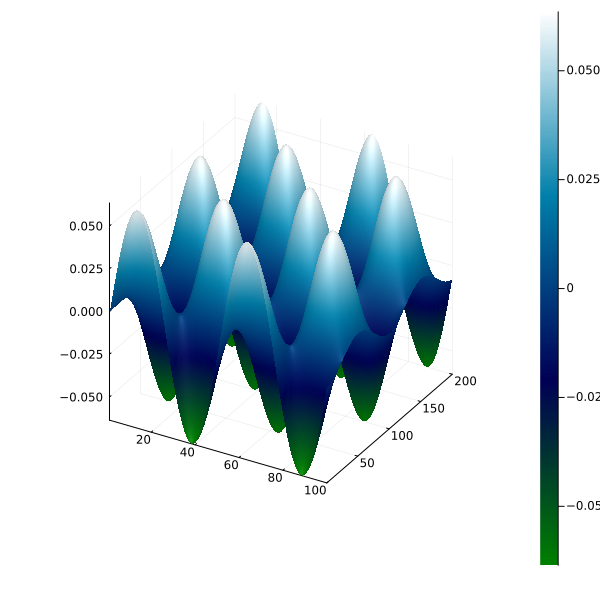

In [224]:
surface(E[1,:,:])

### 3 D check E

In [236]:
include("aux_functions.jl")

J = (200,100,300)
Box = (0.0,1.0,0.0,2.0,1.0,3.2)


ρ = Array{Float64,3}(undef,J)

Box_array = [i for i in Box]
κ = 2π./(Box_array[2:2:end] - Box_array[1:2:end-1])

dx = (Box_array[2:2:end] - Box_array[1:2:end-1])./(J)

x = [Box[1] + (i-1)*dx[1]*(Box[2]-Box[1]) for i in 1:J[1]]
y = [Box[3] + (i-1)*dx[2]*(Box[4]-Box[3]) for i in 1:J[2]]
z = [Box[5] + (i-1)*dx[3]*(Box[6]-Box[5]) for i in 1:J[3]]

@show κ
@show k = [2,2,3].*κ

@show k'*k

#ρ = sin.(k[1]*x) * sin.(k[2]*y)'

for i in 1:J[1]
    for j in 1:J[2]
        for l in 1:J[3]
            ρ[i,j,l] = sin(k[1]*(i-1)*dx[1]) *sin(k[2]*(j-1)*dx[2]) *sin(k[3]*(l-1)*dx[3])
        end
    end
end

Ee = Array{Float64,4}(undef,(3,J...))

for i in 1:J[1]
    for j in 1:J[2]
        for l in 1:J[3]
            Ee[1,i,j,l] = k[1]*(k[1]^2 + k[2]^2 + k[3]^2)^(-1)*cos(k[1]*(i-1)*dx[1])*sin(k[2]*(j-1)*dx[2])*sin(k[3]*(l-1)*dx[3])
            Ee[2,i,j,l] = k[2]*(k[1]^2 + k[2]^2 + k[3]^2)^(-1)*sin(k[1]*(i-1)*dx[1])*cos(k[2]*(j-1)*dx[2])*sin(k[3]*(l-1)*dx[3])
            Ee[3,i,j,l] = k[3]*(k[1]^2 + k[2]^2 + k[3]^2)^(-1)*sin(k[1]*(i-1)*dx[1])*sin(k[2]*(j-1)*dx[2])*cos(k[3]*(l-1)*dx[3])
        end
    end
end

E = Array{Float64,4}(undef,(3,J...))

#plot_matrix(ρ)

#surface(y[1:end],x[1:end],ρ)

#plot(x,ρ[:,25])
#length(x)

κ = [6.283185307179586, 3.141592653589793, 2.855993321445266]
k = [2, 2, 3] .* κ = [12.566370614359172, 6.283185307179586, 8.567979964335798]
k' * k = 270.8023686910468


3×200×100×300 Array{Float64, 4}:
[:, :, 1, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0

[:, :, 2, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0

[:, :, 3, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0

;;; … 

[:, :, 98, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0

In [238]:
get_E!(E,ρ,Box)

200×100×300 Array{Float64, 3}:
[:, :, 1] =
 -2.79803e-18   1.17204e-18  -1.31607e-18  …  -1.05684e-18  -4.15471e-18
 -2.90192e-18   0.000248993   0.000494058     -0.000494058  -0.000248993
 -2.99437e-18   0.000497002   0.000986167     -0.000986167  -0.000497002
 -3.07494e-18   0.000743051   0.00147438      -0.00147438   -0.000743051
 -3.14317e-18   0.000986167   0.00195678      -0.00195678   -0.000986167
 -3.19903e-18   0.00122539    0.00243146   …  -0.00243146   -0.00122539
 -3.24242e-18   0.00145978    0.00289654      -0.00289654   -0.00145978
 -3.27284e-18   0.00168841    0.00335018      -0.00335018   -0.00168841
 -3.28989e-18   0.00191037    0.00379061      -0.00379061   -0.00191037
 -3.2941e-18    0.00212479    0.00421608      -0.00421608   -0.00212479
  ⋮                                        ⋱                
 -1.42583e-18  -0.00212479   -0.00421608       0.00421608    0.00212479
 -1.61007e-18  -0.00191037   -0.00379061       0.00379061    0.00191037
 -1.78761e-18  -0.00168841 

In [239]:
norm(E-Ee)

6.315409597202198e-14